<a href="https://colab.research.google.com/github/lukaskirchdorfer/dhbw-ai-foundations/blob/main/Intro_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Libraries**

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# **Load the diabetes dataset**
**Number of Instances:** 442

**Number of Attributes:**
First 10 columns are numeric predictive values

**Target:**
Column 11 is a quantitative measure of disease progression one year after baseline

**Attribute Information:**

age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

In [ ]:
# Load a sample dataset
from sklearn.datasets import load_diabetes
# Load the diabetes dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True, as_frame=True)

In [ ]:
diabetes_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
diabetes_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

# **First of all, let's use only one feature from X for the training: blood pressure**

In [ ]:
diabetes_X_bp = diabetes_X['bp']
diabetes_X_bp

0      0.021872
1     -0.026328
2     -0.005670
3     -0.036656
4      0.021872
         ...   
437    0.059744
438   -0.067642
439    0.017293
440    0.001215
441   -0.081413
Name: bp, Length: 442, dtype: float64

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_bp, diabetes_y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Create a Linear Regression model
model_bp = LinearRegression()

# Train the model
model_bp.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model_bp.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4379.389507138691
R-squared: 0.1734118396354255


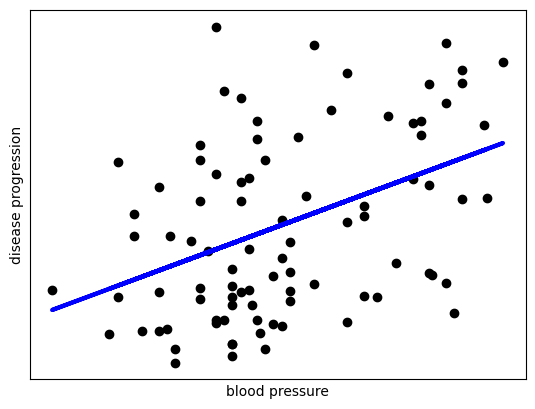

In [ ]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel("blood pressure")
plt.ylabel("disease progression")

plt.xticks(())
plt.yticks(())

plt.show()

# **Now let's use all available features**

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2900.1936284934814
R-squared: 0.4526027629719195


In [ ]:
# The coefficients
coefficients = model.coef_
feature_names = diabetes_X.columns
for feature, coefficient in zip(feature_names, coefficients):
    print(f"{feature}: {coefficient}")

age: 37.904021350074835
sex: -241.96436231273972
bmi: 542.4287585162907
bp: 347.70384391385596
s1: -931.4888458835159
s2: 518.0622769833373
s3: 163.41998299131063
s4: 275.3179015786486
s5: 736.1988589046838
s6: 48.67065743196508


# **Now let's try Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False) # decide the maximal degree of the polynomial feature
X_poly = poly.fit_transform(diabetes_X) # convert the original feature to polynomial feature

In [ ]:
X_poly.shape

(442, 65)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, diabetes_y, test_size=0.2, random_state=42)

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# Create a Linear Regression model
poly_model = LinearRegression()

# Train the model
poly_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = poly_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 3096.0283073442915
R-squared: 0.41563993364079643


## Exercise: Train a Linear Regression model to predict the median house value for different districts in California

**Data Set Characteristics**:

- Number of Instances:
20640

- Number of Attributes:
8 numeric, predictive attributes and the target

**Attribute Information**:

- MedInc: median income in block group

- HouseAge: median house age in block group

- AveRooms: average number of rooms per household

- AveBedrms: average number of bedrooms per household

- Population: block group population

- AveOccup: average number of household members

- Latitude: block group latitude

- Longitude: block group longitude

This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

**The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).**

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

In [4]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Display the DataFrame
print(df)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [5]:
target = housing.target
target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [7]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


- we have no missing values in the dataset

In [16]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


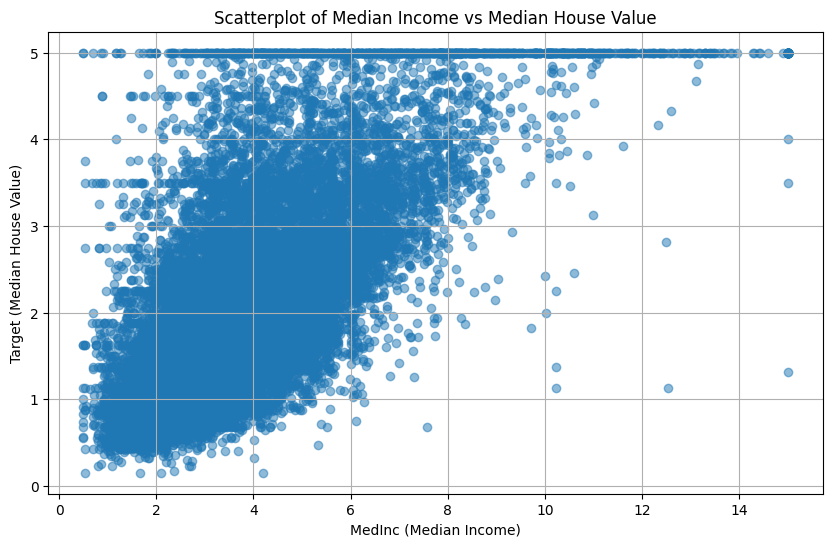

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['MedInc'], target, alpha=0.5)
plt.xlabel('MedInc (Median Income)')
plt.ylabel('Target (Median House Value)')
plt.title('Scatterplot of Median Income vs Median House Value')
plt.grid(True)
plt.show()


In [ ]:
# your code here
# Prepare the data, train a Linear Regression model, evaluate your model


